# Домашнее задание «Функции и работа с данными»

## Задание 1
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [1]:
import pandas as pd

data = pd.read_csv('ratings.csv', sep = ',')

def rating(data):
    if (data['rating'] >= 0) & (data['rating'] <= 2):
        return 'низкий рейтинг'
    elif (data['rating'] > 2) & (data['rating'] <= 4):
        return 'средний рейтинг'
    elif (data['rating'] > 4) & (data['rating'] <= 5):
        return 'высокий рейтинг'
    else:
        return 'ошибка рейтинга'

In [2]:
data['class'] = data.apply(rating, axis=1)
data.head()

,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,средний рейтинг
1,1,1029,3.0,1260759179,средний рейтинг
2,1,1061,3.0,1260759182,средний рейтинг
3,1,1129,2.0,1260759185,низкий рейтинг
4,1,1172,4.0,1260759205,средний рейтинг


## Задание 2
Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {
'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [3]:
geo_data = { 'Центр': ['москва', 'тула', 'ярославль'],
             'Северо-Запад': ['петербург', 'псков', 'мурманск'],
             'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск'] }

In [4]:
df = pd.read_csv('keywords.csv', sep = ',')

def keywords(df):
    keywords_in_row = df['keyword'].lower().split(' ')
    
    if len([x for x in geo_data['Центр'] if x in keywords_in_row]) > 0:
        return 'Центр'
    elif len([x for x in geo_data['Северо-Запад'] if x in keywords_in_row]) > 0:
        return 'Северо-Запад'
    elif len([x for x in geo_data['Дальний Восток'] if x in keywords_in_row]) > 0:
        return 'Дальний Восток'
    else:
        return 'undefined'

In [5]:
df['region'] = df.apply(keywords, axis=1)
df[df['region'] == 'Центр'].head()

,keyword,shows,region
127,авито москва,979292,Центр
849,авито ярославль,209581,Центр
1259,москва,153050,Центр
1396,гисметео москва,140279,Центр
1482,госуслуги москва,133061,Центр


In [6]:
df['region'] = df.apply(keywords, axis=1)
df[df['region'] == 'Северо-Запад'].head()

,keyword,shows,region
370,авито ру санкт петербург,425134,Северо-Запад
1236,банк санкт петербург,174375,Северо-Запад
1346,санкт петербург,144232,Северо-Запад
2153,авито псков,98931,Северо-Запад
2398,авито мурманск,89787,Северо-Запад


In [7]:
df['region'] = df.apply(keywords, axis=1)
df[df['region'] == 'Дальний Восток'].head()

,keyword,shows,region
1063,фарпост владивосток,176951,Дальний Восток
2175,дром хабаровск,98361,Дальний Восток
3206,дром владивосток,73084,Дальний Восток
3275,100 сп владивосток,76418,Дальний Восток
3687,авито хабаровск,63736,Дальний Восток


In [8]:
df['region'] = df.apply(keywords, axis=1)
df[df['region'] == 'undefined'].head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


## Задание 3 (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл movies.csv и ratings.csv). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

- В переменную years запишите список из всех годов с 1950 по 2010.

- Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. 

Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

- для каждой строки пройдите по всем годам списка years: если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

- Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [9]:
import re

years = list(range(1950, 2011))

films = pd.read_csv('movies.csv', sep=',')
ratings = pd.read_csv('ratings.csv', sep=',')

fr = films.merge(ratings, on='movieId') 

def production_year(fr):
    title = fr['title']
    year = re.findall(r'\d{4}', title)
    
    if (len(year) == 0) or (int(year[0]) not in years):
        return '1900'
    else:
        return year[0] 

fr['year'] = fr.apply(production_year, axis=1)
mean_rating = fr.groupby('year')['rating'].mean().to_frame().sort_values('rating', ascending = False).reset_index()
mean_rating

,year,rating
0,1957,4.014241
1,1972,4.011136
2,1952,4.000000
3,1974,3.999058
4,1954,3.994220
...,...,...
57,2005,3.448434
58,2003,3.445843
59,1996,3.422675
60,1997,3.416934


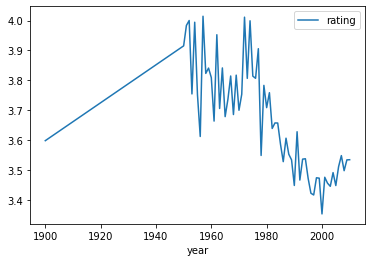

In [10]:
import matplotlib.pyplot as plt

mean_rating['year'] = pd.to_numeric(mean_rating['year'], errors='coerce')
mean_rating.sort_values('year', ascending = True).reset_index().plot(x='year', y='rating')
plt.show()